In [14]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [15]:
f_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\Qiskit\SKQD\BasisTesting\Aer"
folders = ["Fock", "Position","Position+QFT", "Position+QFT+NoDiag"]

In [24]:
def get_data(f_path, folders, potential, cutoffs, metric_key="num_2q_ops"):

    all_data = {}

    for folder in folders:

        metric_data = []

        for cutoff in cutoffs:
            d_path = os.path.join(f_path, folder, potential, f'{potential}_{cutoff}.json')
            
            try:
                with open(d_path, 'r') as json_file:
                    data = json.load(json_file)

                metric = data['all_run_data'][0]['circuit_cost'][metric_key]
                metric = None if metric == 0 else metric
                metric_data.append(metric)
            except:
                metric_data.append(None)

        all_data[folder] = metric_data

    return all_data

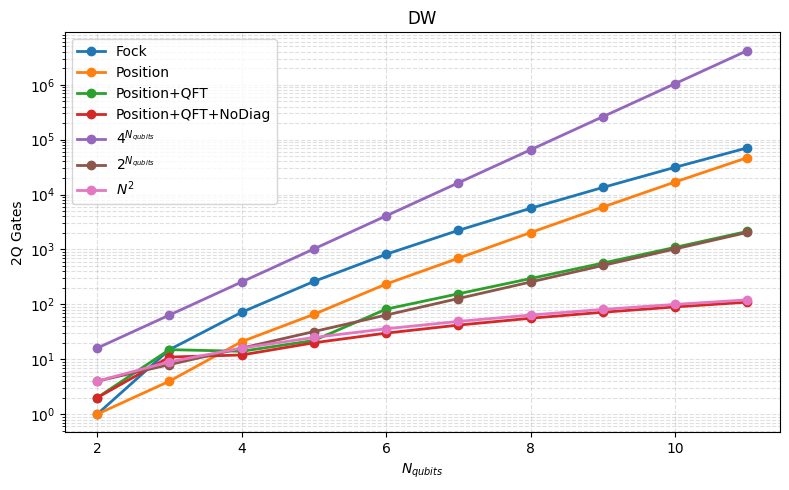

In [17]:
cutoffs = [2**n for n in range(1,11)]
num_qubits = [int(1+np.log2(c)) for c in cutoffs]
scaling_4 = [4**(int(1+np.log2(c))) for c in cutoffs]
scaling_2 = [2**(int(1+np.log2(c))) for c in cutoffs]
scaling_3 = [(int(1+np.log2(c)))**2 for c in cutoffs]

potential = "DW"
metric_key = "num_2q_ops" #"num_2q_ops"
all_data = get_data(f_path, folders, "DW", cutoffs, metric_key=metric_key)
all_data['$4^{N_{qubits}}$'] = scaling_4
all_data['$2^{N_{qubits}}$'] = scaling_2
all_data['$N^{2}$'] = scaling_3

plt.figure(figsize=(8, 5))
for label, y in all_data.items():
    plt.plot(num_qubits, y, marker="o", linewidth=2, label=label)

plt.yscale("log")
#plt.xscale("log")
plt.xlabel("$N_{qubits}$")
plt.ylabel("2Q Gates")
plt.title(f"{potential}")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
f_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\Qiskit\SKQD\BasisTesting\RealTranspile"
folders = ["Fock", "Fock+Trunc", "Position","Position+QFT", "Position+QFT+Trunc"]
#folders = ["Position+QFT+NoDiag"]

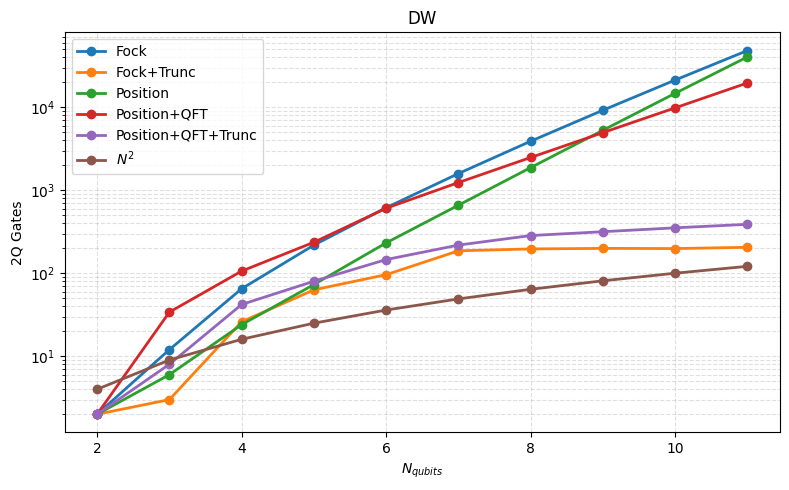

In [ ]:
potential = "DW"
metric_key = "num_2q_ops" #"num_2q_ops"

cutoffs = [2**n for n in range(1,11)]
num_qubits = [int(1+np.log2(c)) for c in cutoffs]

scaling = [(int(1+np.log2(c)))**2 for c in cutoffs]

all_data = get_data(f_path, folders, potential, cutoffs, metric_key=metric_key)
all_data['$N^{2}$'] = scaling

plt.figure(figsize=(8, 5))
for label, y in all_data.items():
    plt.plot(num_qubits, y, marker="o", linewidth=2, label=label)

plt.yscale("log")
#plt.xscale("log")
plt.xlabel("$N_{qubits}$")
plt.ylabel("2Q Gates")
plt.title(f"{potential}")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


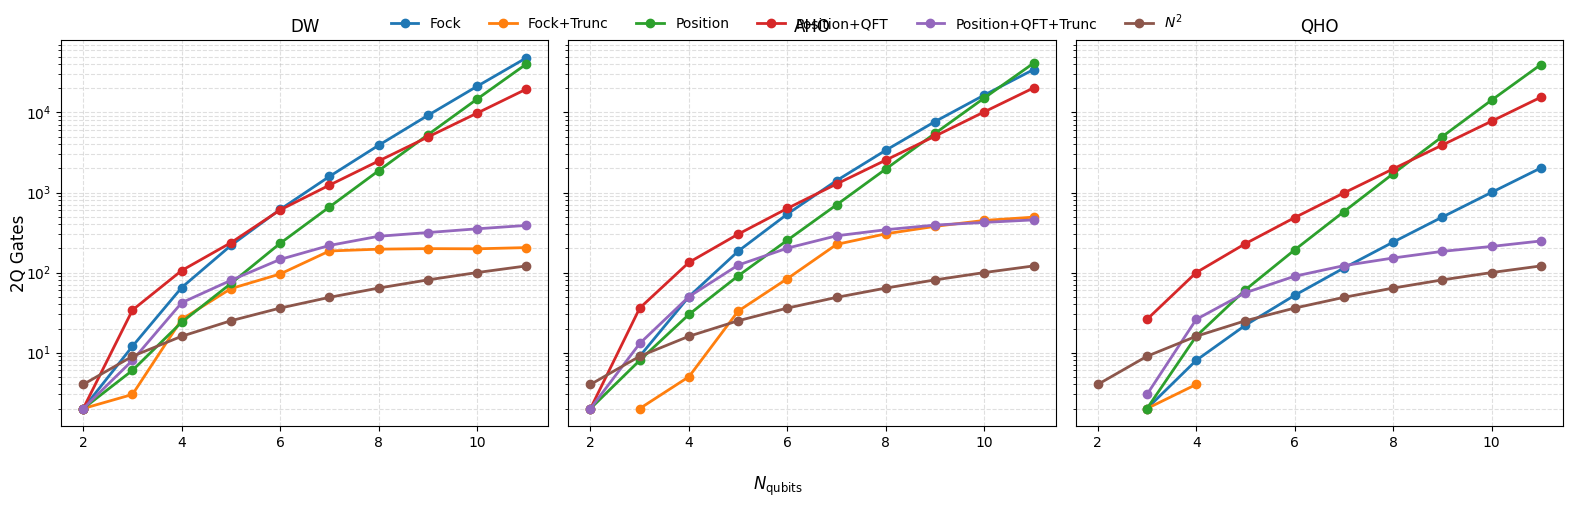

In [33]:
f_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\Qiskit\SKQD\BasisTesting\RealTranspile"
folders = ["Fock", "Fock+Trunc", "Position","Position+QFT", "Position+QFT+Trunc"]
#folders = ["Position+QFT+NoDiag"]

metric_key = "num_2q_ops"
potentials = ["DW", "AHO", "QHO"]

cutoffs = [2**n for n in range(1, 11)]
num_qubits = [int(1 + np.log2(c)) for c in cutoffs]
scaling = [(int(1 + np.log2(c)))**2 for c in cutoffs]

fig, axes = plt.subplots(1, len(potentials),figsize=(16, 5),sharex=True,sharey=True)

for ax, potential in zip(axes, potentials):
    all_data = get_data(f_path, folders, potential, cutoffs, metric_key=metric_key)
    all_data[r"$N^{2}$"] = scaling

    for label, y in all_data.items():
        ax.plot(num_qubits, y, marker="o", linewidth=2, label=label)

    ax.set_yscale("log")
    ax.set_title(potential)
    ax.grid(True, which="both", linestyle="--", alpha=0.4)

fig.supxlabel(r"$N_{\mathrm{qubits}}$")
fig.supylabel("2Q Gates")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=len(labels), frameon=False)

fig.tight_layout()
plt.show()
